# Geospacial Analysis - Restaurant Data

In [1]:
%pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 22.0/22.0 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 5.1/5.1 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'e:\Data Science 12 Projects\.modules\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
%pip install folium 

     -------------------------------------- 102.3/102.3 KB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'e:\Data Science 12 Projects\.modules\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import geopandas as gpd
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMapWithTime

In [2]:
# read data
path = 'E:\Data Science 12 Projects\data_restaurant'
df = pd.read_csv(path + '/zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
# check the columns
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.shape    

(51717, 17)

In [6]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

## Data Cleaning
## Find % of missing values in each column
## Deal with missing values

In [7]:
# check the null values
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
# check the feature with null values
feature_na = [feature for feature in df.columns if df[feature].isnull().sum()>0]

In [9]:
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [10]:
# porcentage of null values
for feature in feature_na:
    print(feature, np.round((df[feature].isnull().sum()/len(df))*100, 2), '% missing values')

rate 15.03 % missing values
phone 2.34 % missing values
location 0.04 % missing values
rest_type 0.44 % missing values
dish_liked 54.29 % missing values
cuisines 0.09 % missing values
approx_cost(for two people) 0.67 % missing values


In [11]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
# erase the nan values
#df['rate'].dropna(inplace=True)
df.dropna(axis='index',subset=['rate'], inplace=True)

In [13]:
df.shape

(43942, 17)

In [14]:
# erase the /5
df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))

In [15]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [16]:
df['rate'].unique()	

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [17]:
# replace the NEW
df['rate'] = df['rate'].apply(lambda x: x.replace('NEW','0'))

In [18]:
# replace the -
df['rate'] = df['rate'].apply(lambda x: x.replace('-','0'))

In [19]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '0', '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [20]:
# convert the rate to float
df['rate'] = df['rate'].astype(float)

In [21]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Calculate the Avg Rating for each restaurant

In [22]:
# create a group by the name of the restaurant
df_rate = df.groupby('name')['rate'].mean().sort_values(ascending=False).to_frame().reset_index()

In [23]:
# change the name of the columns
df_rate.columns = ['restaurant', 'avg_rate']
df_rate.head()

,restaurant,avg_rate
0,Asia Kitchen By Mainland China,4.900000
1,Byg Brewski Brewing Company,4.900000
2,SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,4.900000
3,Punjab Grill,4.871429
4,Belgian Waffle Factory,4.844828


C:\Users\rober\AppData\Local\Temp\ipykernel_20696\2928596081.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rate['avg_rate'])


<AxesSubplot: xlabel='avg_rate', ylabel='Density'>

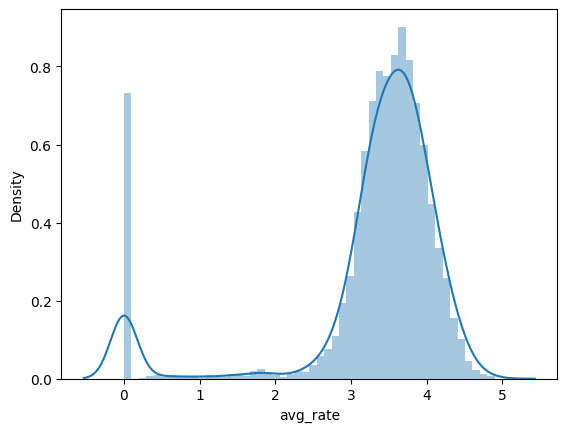

In [24]:
sns.distplot(df_rate['avg_rate'])

# Top Restaurants chains

Text(0.5, 0, 'Number of outlets')

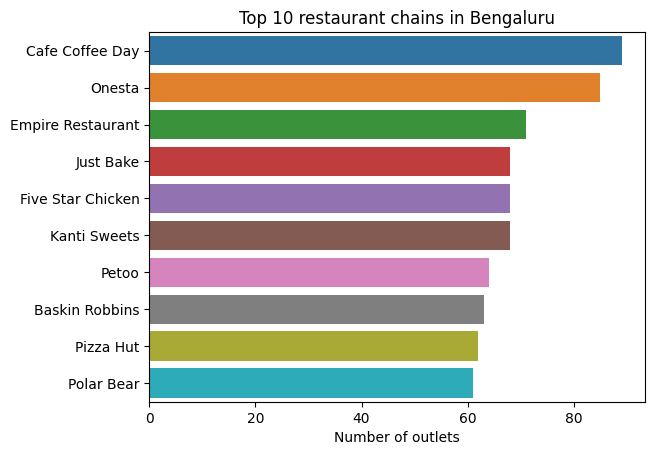

In [25]:
chains = df['name'].value_counts()[:10]
chains
sns.barplot(x=chains, y=chains.index)
plt.title('Top 10 restaurant chains in Bengaluru')
plt.xlabel('Number of outlets')


In [26]:
# How many of the restaurant do not have online delivery
value_x = df['online_order'].value_counts()


In [27]:
value_x

Yes    28308
No     15634
Name: online_order, dtype: int64

In [28]:
labels = ['Accepted', 'Not Accepted']

In [29]:
# create a pie chart to show the porcentage of the restaurant with online delivery
px.pie(df, values=value_x, labels=labels, title='Online delivery')

# Ratio between Restaurant that provide table and do not provide table
# Indepth Analysis of types of restaurants we have
# Highest rated restaurant chains
# Total restaurants at different locations of Bengaluru

In [30]:
df['book_table'].value_counts()

No     37509
Yes     6433
Name: book_table, dtype: int64

In [31]:
import plotly.graph_objects as go
from plotly.offline import iplot

In [32]:
book_table = df['book_table'].value_counts()

In [33]:
go.Figure(data=[go.Pie(labels=book_table.index, values=book_table.values, hole=.3)])

# Indepth Analysis of types of restaurants we have

In [34]:
# find the null values of rest_type
df['rest_type'].isnull().sum()

151

In [35]:
# drop the null values
df.dropna(axis='index',subset=['rest_type'], inplace=True)

In [36]:
# check the unique values of the rest_type
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [37]:
trace = go.Bar(x=df['rest_type'].value_counts().nlargest(10).index, y=df['rest_type'].value_counts().nlargest(10).values)

In [38]:
iplot([trace])

# highest voted restaurant 

In [39]:
# find the 20 highest voted restaurant
df_rate = df.groupby('name')['votes'].sum().sort_values(ascending=False).to_frame().reset_index()

<AxesSubplot: xlabel='restaurant'>

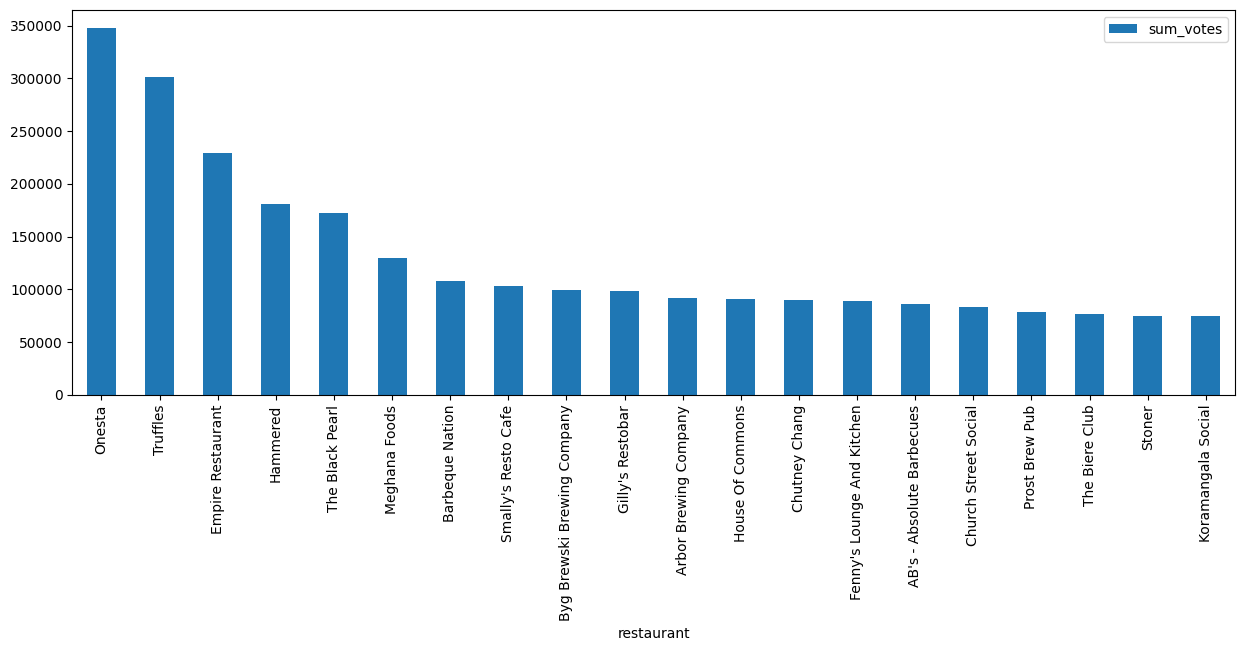

In [40]:
df_rate.columns = ['restaurant', 'sum_votes']
df_rate.head(20).plot(kind='bar', x='restaurant', y='sum_votes', figsize=(15,5))

In [41]:
# using the iplot to show the 20 highest voted restaurant
trace1 = go.Bar(x=df_rate['restaurant'].head(20), y=df_rate['sum_votes'].head(20))


In [42]:
iplot([trace1])

# Total restaurants at different locations of Bengaluru

In [43]:
restaurant = []
location = []
for key, location_df in df.groupby('location'):
    restaurant.append(len(location_df['name'].unique()))
    location.append(key)
    

In [44]:
df_total = pd.DataFrame({'location':location, 'restaurant':restaurant})
df_total.head()

,location,restaurant
0,BTM,578
1,Banashankari,238
2,Banaswadi,150
3,Bannerghatta Road,361
4,Basavanagudi,195


In [45]:
# set the location as an index
df_total.set_index('location', inplace=True)
df_total.head()

,restaurant
location,
BTM,578
Banashankari,238
Banaswadi,150
Bannerghatta Road,361
Basavanagudi,195


In [46]:
# sort the values of dataframe by the highest number of restaurant
df_total.sort_values(by='restaurant', ascending=False, inplace=True)
df_total.head(10)

,restaurant
location,
Whitefield,633
BTM,578
HSR,551
Marathahalli,520
Electronic City,515
Indiranagar,466
JP Nagar,398
Bannerghatta Road,361
Jayanagar,310


<AxesSubplot: xlabel='location'>

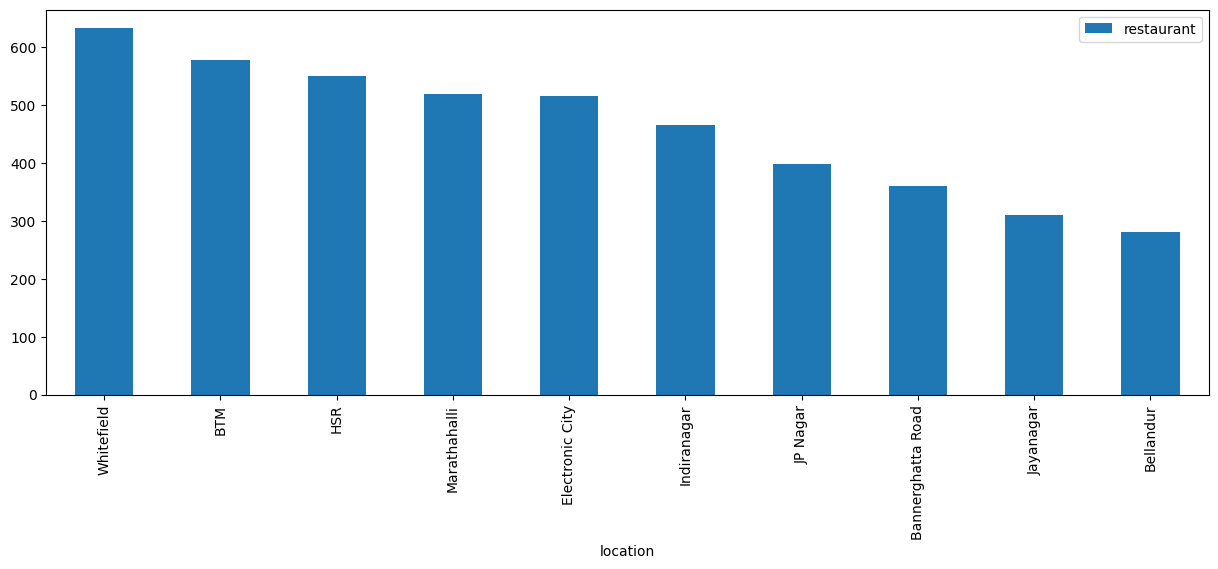

In [47]:
df_total.head(10).plot(kind='bar', figsize=(15,5))

In [48]:
# using the iplot

trace2 = go.Bar(x=df_total.index, y=df_total['restaurant'].head(10))
# add a title to the graph
layout = go.Layout(title='Top 10 locations with the highest number of restaurants')
# create a figure
fig = go.Figure(data=[trace2], layout=layout)
# show the figure
iplot(fig)



# Total number of varieties of restaurants in each location
# Analyse aprox cost of 2 people feature
# analyse aprox cost of 2 people vs rating. find the relation between them
# Is there any relation between the number of votes and the rating of the restaurant?
# Is there any relation between the number of votes and the rating of the restaurant?

In [49]:
cuisines = df['cuisines'].value_counts().nlargest(10)
cuisines

North Indian                           2284
North Indian, Chinese                  2036
South Indian                           1320
Cafe                                    653
Bakery, Desserts                        644
Biryani                                 632
South Indian, North Indian, Chinese     601
Fast Food                               580
Desserts                                572
Chinese                                 449
Name: cuisines, dtype: int64

In [50]:
trace3 = go.Bar(x=cuisines.index, y=cuisines.values)
layout = go.Layout(title='Top 10 cuisines in Bengaluru')
fig = go.Figure(data=[trace3], layout=layout)
iplot(fig)

# Analyse aprox cost of 2 people feature

In [122]:
# create a copy of df
df_copy = pd.read_csv(path + '/zomato.csv')


In [51]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [52]:
# ckeck the null values
df['approx_cost(for two people)'].isnull().sum()

250

In [54]:
# drop the null values
df.dropna(axis='index',subset=['approx_cost(for two people)'], inplace=True)

In [55]:
df['approx_cost(for two people)'].isnull().sum()


0

In [56]:
# check the type of the column
df['approx_cost(for two people)'].dtype

dtype('O')

In [57]:
# unique values
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [58]:
# eliminate the comma
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [59]:
# convert the column to float
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

C:\Users\rober\AppData\Local\Temp\ipykernel_20696\1364767439.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='approx_cost(for two people)', ylabel='Density'>

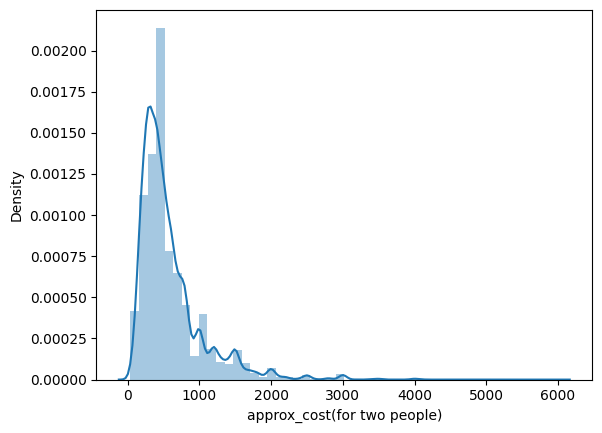

In [60]:
# check the distribution 
sns.distplot(df['approx_cost(for two people)'])

<AxesSubplot: xlabel='rate', ylabel='approx_cost(for two people)'>

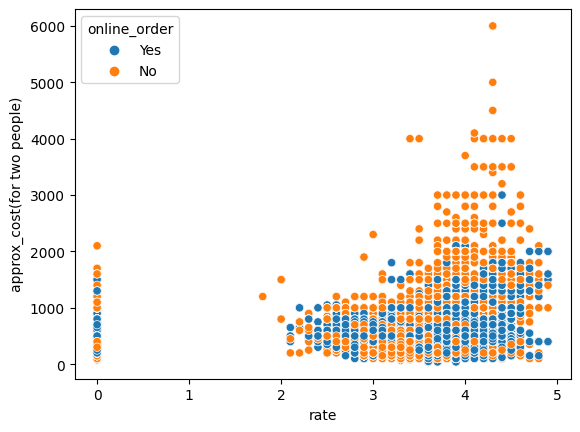

In [61]:
# in order to see the relation we need to use the df dataframe not the df_copy
sns.scatterplot(x='rate', y='approx_cost(for two people)', hue='online_order',data=df)

In [62]:
px.box(df, x='online_order', y='votes')

In [63]:
px.box(df, x='online_order', y='approx_cost(for two people)')


# Total Restaurants that have good Rating > 4 and are cheap
# Total various affordables hotels in each location
# Finding best budget restaurants in each location
# Which are the foodies areas in Bengaluru?

In [64]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [65]:
# check the null values for rate
df['rate'].isnull().sum()

0

In [70]:
# rate greater than 4
df[(df['rate'] > 4) & (df['approx_cost(for two people)'] <= 500)].shape

(2436, 17)

In [73]:
len(df[(df['rate'] > 4) & (df['approx_cost(for two people)'] <= 500)]['name'].unique())

372

# Total various affordables hotels in each location

In [74]:
df_new = df[(df['rate'] > 4) & (df['approx_cost(for two people)'] <= 500)]
df_new.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
10,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1,402,080 26724489\r\n+91 7406048982,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500.0,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari
12,https://www.zomato.com/bangalore/the-coffee-sh...,"6th Block, 3rd Stage, Banashankari, Bangalore",The Coffee Shack,Yes,Yes,4.2,164,+91 9731644212,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500.0,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari
34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500.0,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari
51,https://www.zomato.com/bangalore/shree-cool-po...,"1514, 4th Cross, 7th Main, RPC layout, 2nd Sta...",Shree Cool Point,Yes,No,4.1,28,+91 9900617124,Vijay Nagar,Quick Bites,NaN,"Fast Food, Street Food, Beverages",150.0,"[('Rated 5.0', 'RATED\n Who would say no to s...","['Vegetable Sandwich', 'Vegetable Sandwich wit...",Delivery,Banashankari
52,https://www.zomato.com/bangalore/corner-house-...,"808/6-1, 24th A Cross, K.R Road, 2nd Stage, Ba...",Corner House Ice Cream,No,No,4.3,345,080 26713965\r\n+91 9845444155,Banashankari,Dessert Parlor,"Hot Chocolate Fudge, Vanilla Ice Cream, Fudge ...","Ice Cream, Desserts",400.0,"[('Rated 3.0', ""RATED\n Always a fan of corne...",[],Delivery,Banashankari


In [76]:
location = []
total = []

for key, location_df in df_new.groupby('location'):
    location.append(key)
    total.append(len(location_df['name'].unique()))

df_location = pd.DataFrame({'location':location, 'total':total}).sort_values(by='total', ascending=False)
df_location.head()

,location,total
30,Koramangala 5th Block,42
22,Jayanagar,42
20,Indiranagar,37
16,HSR,35
0,BTM,28


In [77]:
def return_bugdet(location, restaurant):
    budget = df[(df['approx_cost(for two people)'] <= 400) & (df['location'] == location) & (df['rate'] > 4) & (df['rest_type'] == restaurant)]
    return budget['name'].unique()

In [78]:
return_bugdet('BTM', 'Quick Bites')

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

In [79]:
# find the top 10 restaurant in each location
restaurant_location = df['location'].value_counts().nlargest(10)
restaurant_location

BTM                      4210
Koramangala 5th Block    2358
HSR                      2102
Indiranagar              1889
JP Nagar                 1842
Jayanagar                1709
Whitefield               1683
Marathahalli             1470
Bannerghatta Road        1314
Koramangala 6th Block    1088
Name: location, dtype: int64

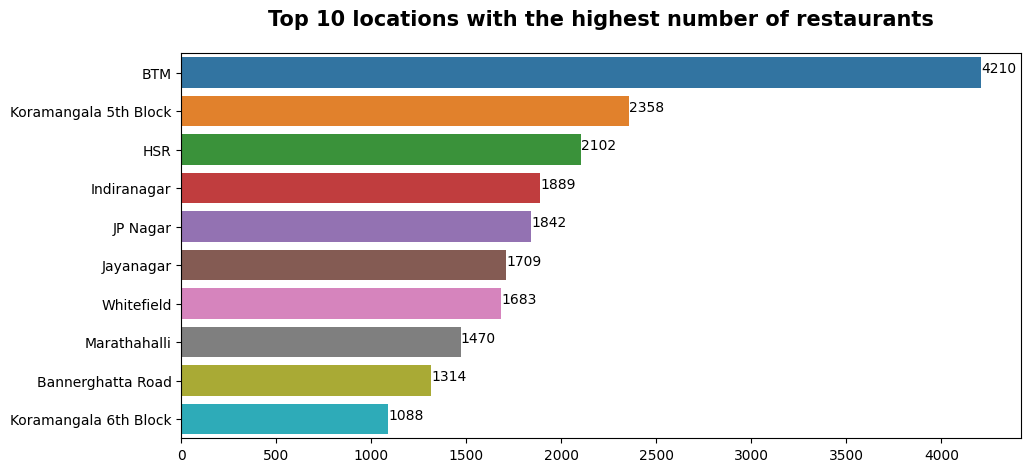

In [90]:
plt.figure(figsize=(14, 5))
sns.barplot(x=restaurant_location.values, y=restaurant_location.index)
# add a title to the graph and show the values
# add space between the bar and the title
plt.subplots_adjust(left=0.3)
plt.title('Top 10 locations with the highest number of restaurants', fontsize=15, fontweight='bold', pad=20, loc='center')
for index, value in enumerate(restaurant_location.values):
    plt.text(value, index, str(value))
plt.show()

# Geospacial Analysis - Restaurant Data

In [98]:
# find restaurant in each location
locations = pd.DataFrame({'Name':df['location'].unique()})
locations.head()

,Name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout


In [93]:
%pip install geopy

     -------------------------------------- 119.8/119.8 KB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 KB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'e:\Data Science 12 Projects\.modules\Scripts\python.exe -m pip install --upgrade pip' command.


In [94]:
from geopy.geocoders import Nominatim

In [108]:
#get the latitude and longitude of each location
geolocator = Nominatim(user_agent="app")
geolocator


In [112]:
ladd1 = "27488 Stanford Avenue, North Dakota"
print("Location address:", ladd1)
location = geolocator.geocode(ladd1)
print("Latitude and Longitude of the said address:")


Location address: 27488 Stanford Avenue, North Dakota


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=27488+Stanford+Avenue%2C+North+Dakota&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [104]:
lat_long = []
for location in locations['Name'].head():
    location = geolocator.geocode('location')
    print(location)
    if location is None:
        lat_long.append(np.nan)  # if the location is not found, add nan
        
    else:
        geo = (location.latitude, location.longitude)
        lat_long.append(geo)


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Banashankari&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [109]:
locations['geo_loc'] = lat_long

ValueError: Length of values (0) does not match length of index (92)

In [110]:
locations.head()

,Name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout


In [113]:
rest_locations = pd.DataFrame(df['location'].value_counts().reset_index())
rest_locations.head()

,index,location
0,BTM,4210
1,Koramangala 5th Block,2358
2,HSR,2102
3,Indiranagar,1889
4,JP Nagar,1842


In [114]:
rest_locations.columns = ['Name', 'Count']
rest_locations.head()

,Name,Count
0,BTM,4210
1,Koramangala 5th Block,2358
2,HSR,2102
3,Indiranagar,1889
4,JP Nagar,1842


In [ ]:
# combine the two dataframes together (lat - long)
restaurant_locations = rest_locations.merge(locations, on='Name', how='left').dropna()
restaurant_locations.head()

In [ ]:
np.array(restaurant_locations['geo_loc'])

In [ ]:
lat, lon = zip(*np.array(restaurant_locations['geo_loc']))

In [ ]:
type(lat)

In [ ]:
restaurant_locations['lat'] = lat
restaurant_locations['lon'] = lon

In [ ]:
restaurant_locations.head()

In [ ]:
restaurant_locations.drop('geo_loc', axis=1, inplace=True)

In [115]:
# use the folium library to plot the map
def generatebasemap(default_location=[12.9716, 77.5946], default_zoom_start=12):
    basemap = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return basemap

In [117]:
basemap = generatebasemap()
basemap

In [ ]:
# add a heatmap to the map
HeatMap(data=restaurant_locations[['lat', 'lon', 'Count']].groupby(['lat', 'lon']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(basemap)

In [ ]:
basemap

# Heatmap of North Indian Restaurants in Bengaluru

In [118]:
df2 = df[df['cuisines']== 'North Indian']
df2.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
50,https://www.zomato.com/bangalore/petoo-banasha...,"276, Ground Floor, 100 Feet Outer Ring Road, B...",Petoo,No,No,3.7,21,+91 8026893211,Banashankari,Quick Bites,NaN,North Indian,450.0,"[('Rated 2.0', 'RATED\n This is a neatly made...",[],Delivery,Banashankari
72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,0.0,0,+91 8050884222,Banashankari,Quick Bites,NaN,North Indian,150.0,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
87,https://www.zomato.com/bangalore/krishna-sagar...,"38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...",Krishna Sagar,No,No,3.5,31,+91 8892752997\r\n+91 7204780429,Banashankari,Quick Bites,NaN,North Indian,200.0,"[('Rated 1.0', 'RATED\n Worst experience with...",[],Delivery,Banashankari
94,https://www.zomato.com/bangalore/nandhini-delu...,"304, Opposite Apollo Public School, 100 Feet R...",Nandhini Deluxe,No,No,2.6,283,080 26890011\r\n080 26890033,Banashankari,Casual Dining,"Biryani, Chicken Guntur, Thali, Buttermilk, Ma...",North Indian,600.0,"[('Rated 3.0', 'RATED\n Ididnt like much.\n\n...",[],Delivery,Banashankari


In [119]:
df2.shape

(2244, 17)

In [120]:
north_indian = df2.groupby(['location'], as_index=False)['url'].agg('count')
north_indian.head()

,location,url
0,BTM,262
1,Banashankari,35
2,Banaswadi,5
3,Bannerghatta Road,60
4,Basavanagudi,17


In [121]:
north_indian.columns = ['Name', 'count']

In [122]:
north_indian.head()

,Name,count
0,BTM,262
1,Banashankari,35
2,Banaswadi,5
3,Bannerghatta Road,60
4,Basavanagudi,17


In [ ]:
north_indian = north_indian.merge(locations, on='Name', how='left').dropna()
north_indian.head()

In [ ]:
north_indian['lat'], north_indian['lon'] = zip(*north_indian['geo_loc'].values)
north_indian.drop('geo_loc', axis=1, inplace=True)

In [ ]:
north_indian.head()

In [ ]:
basemap = generatebasemap()
HeatMap(data=north_indian[['lat', 'lon', 'count']].values.tolist(), radius=8, max_zoom=13).add_to(basemap)
basemap

# Which are the most popular casual dining Restaurnat chains?

In [123]:
df_1 = df.groupby(['rest_type', 'name']).agg('count')
df_1.head()

url  address  online_order  book_table  rate  \
rest_type name                                                              
Bakery    7th Heaven           2        2             2           2     2   
          A Little For Love    1        1             1           1     1   
          Adarsh Bakery        2        2             2           2     2   
          Adi's Cake N Cafe    2        2             2           2     2   
          Albert Bakery        1        1             1           1     1   

                             votes  phone  location  dish_liked  cuisines  \
rest_type name                                                              
Bakery    7th Heaven             2      2         2           0         2   
          A Little For Love      1      1         1           0         1   
          Adarsh Bakery          2      2         2           0         2   
          Adi's Cake N Cafe      2      2         2           0         2   
          Albert Bakery          1      1         1           1         1   

                             approx_cost(for two people)  reviews_list  \
rest_type name                                                           
Bakery    7th Heaven                                   2             2   
          A Little For Love                            1             1   
          Adarsh Bakery                                2             2   
          Adi's Cake N Cafe                            2             2   
          Albert Bakery                                1             1   

                             menu_item  listed_in(type)  listed_in(city)  
rest_type name                                                            
Bakery    7th Heaven                 2                2                2  
          A Little For Love          1                1                1  
          Adarsh Bakery              2                2                2  
          Adi's Cake N Cafe          2                2                2  
          Albert Bakery              1                1                1

In [124]:
df_1.shape

(7712, 15)

In [129]:
df_1.sort_values(by='url', ascending=False).groupby(['rest_type'], as_index=False).apply(lambda x: x.sort_values(by='url', ascending=False))

url  address  online_order  \
   rest_type          name                                                     
0  Bakery             Just Bake                    44       44            44   
                      Warm Oven                    28       28            28   
                      INDULGE by InnerChef         28       28            28   
                      Karachi Bakery               26       26            26   
                      CakeZone                     21       21            21   
...                                               ...      ...           ...   
86 Takeaway, Delivery Agraharam Meal                1        1             1   
                      Adyar Ananda Bhavan Sweets    1        1             1   
                      Faasos                        1        1             1   
                      @North Parontha Hut           1        1             1   
                      Lucky Singh & Co              1        1             1   

                                                  book_table  rate  votes  \
   rest_type          name                                                  
0  Bakery             Just Bake                           44    44     44   
                      Warm Oven                           28    28     28   
                      INDULGE by InnerChef                28    28     28   
                      Karachi Bakery                      26    26     26   
                      CakeZone                            21    21     21   
...                                                      ...   ...    ...   
86 Takeaway, Delivery Agraharam Meal                       1     1      1   
                      Adyar Ananda Bhavan Sweets           1     1      1   
                      Faasos                               1     1      1   
                      @North Parontha Hut                  1     1      1   
                      Lucky Singh & Co                     1     1      1   

                                                  phone  location  dish_liked  \
   rest_type          name                                                      
0  Bakery             Just Bake                      44        44          14   
                      Warm Oven                      28        28           7   
                      INDULGE by InnerChef           28        28           0   
                      Karachi Bakery                 24        26           3   
                      CakeZone                       21        21          10   
...                                                 ...       ...         ...   
86 Takeaway, Delivery Agraharam Meal                  1         1           1   
                      Adyar Ananda Bhavan Sweets      1         1           0   
                      Faasos                          1         1           1   
                      @North Parontha Hut             1         1           0   
                      Lucky Singh & Co                1         1           1   

                                                  cuisines  \
   rest_type          name                                   
0  Bakery             Just Bake                         44   
                      Warm Oven                         28   
                      INDULGE by InnerChef              28   
                      Karachi Bakery                    26   
                      CakeZone                          21   
...                                                    ...   
86 Takeaway, Delivery Agraharam Meal                     1   
                      Adyar Ananda Bhavan Sweets         1   
                      Faasos                             1   
                      @North Parontha Hut                1   
                      Lucky Singh & Co                   1   

                                                  approx_cost(for two people)  \
   rest_type          name                                       

In [132]:
dataset = df_1.sort_values(by='url', ascending=False).groupby(['rest_type'], as_index=False).apply(
    lambda x: x.sort_values(by='url', ascending=False))['url'].reset_index().rename(columns={'url':'count'})

In [133]:
dataset.head()

,level_0,rest_type,name,count
0,0,Bakery,Just Bake,44
1,0,Bakery,Warm Oven,28
2,0,Bakery,INDULGE by InnerChef,28
3,0,Bakery,Karachi Bakery,26
4,0,Bakery,CakeZone,21


In [134]:
casual = dataset[dataset['rest_type'] == 'Casual Dining']
casual.head()

,level_0,rest_type,name,count
1001,24,Casual Dining,Empire Restaurant,58
1002,24,Casual Dining,Beijing Bites,48
1003,24,Casual Dining,Mani's Dum Biryani,47
1004,24,Casual Dining,Chung Wah,46
1005,24,Casual Dining,Oye Amritsar,41
